<a href="https://colab.research.google.com/github/FernandoElizarraras7/SIMULACION-I/blob/main/ACEPTACION_Y_RECHAZO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MÉTODO DE ACEPTACIÓN Y RECHAZO
El método de aceptación y rechazo es una técnica utilizada para generar muestras aleatorias a partir de una distribución de probabilidad dada, especialmente cuando la forma de la distribución no permite usar métodos más directos. En este ejemplo, implementaremos el método de aceptación y rechazo para la distribución normal estándar.

### Definir la función de densidad de probabilidad (fdp) de la distribución normal
La función de densidad de probabilidad de una variable aleatoria normal estándar (media 0 y desviación estándar 1) está dada por:
$$f(x)=\frac{1}{\sqrt{2π}}e^{-x^2/2}$$
### Gráfica de la fdp


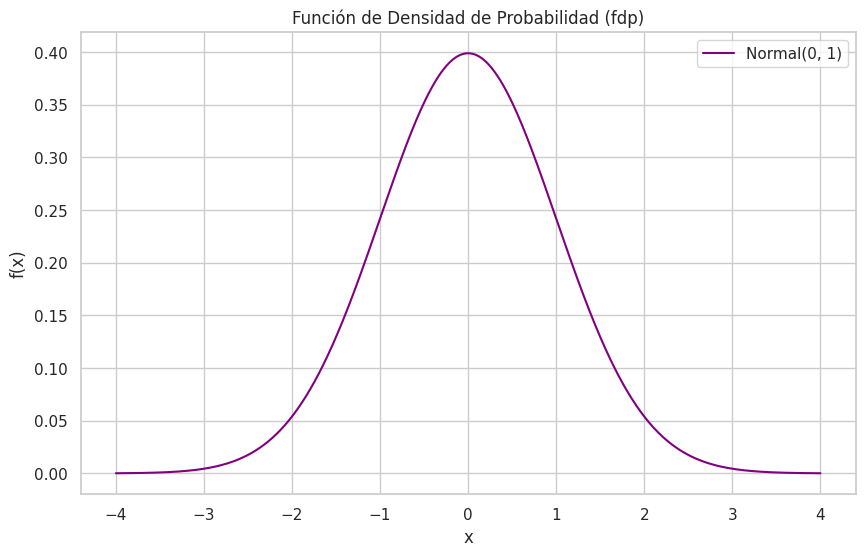

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Establecer el estilo de los gráficos
sns.set(style="whitegrid")

# Función de densidad de probabilidad
def normal_fdp(x):
    return (1/np.sqrt(2*np.pi)) * np.exp(-x**2 / 2)
# Valores de x
x = np.linspace(-4, 4, 1000)

# Valores de la fdp
y = normal_fdp(x)

# Gráfica de la fdp
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normal(0, 1)', color='purple')
plt.title('Función de Densidad de Probabilidad (fdp)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

### Definir la función de distribución acumulativa (FDA) de la distribución normal
La función de distribución acumulativa (FDA) de una variable aleatoria normal estándar está dada por:
$$F(x)=\frac{1}{2}[1+erf(\frac{x}{\sqrt{2}})]$$
### Gráfica de la FDA

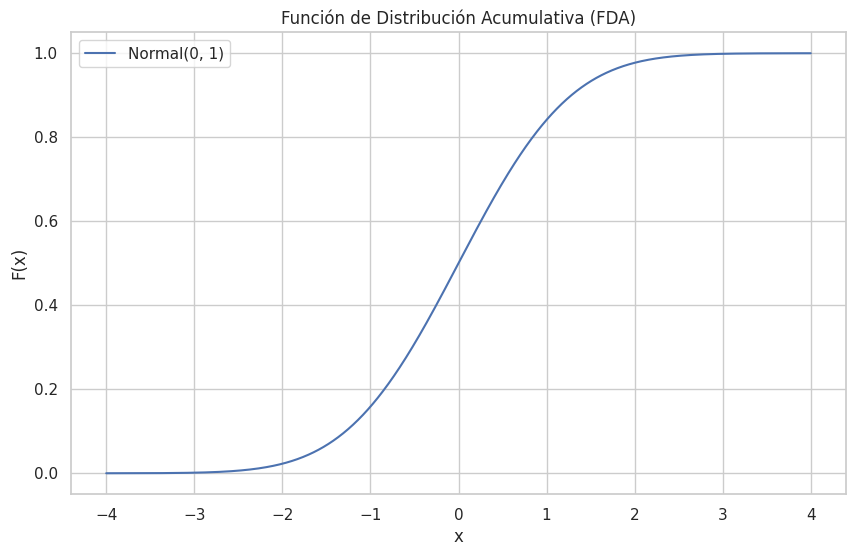

In [ ]:
# Valores de la FDA
y_cdf = norm.cdf(x)

# Gráfica de la FDA
plt.figure(figsize=(10, 6))
plt.plot(x, y_cdf, label='Normal(0, 1)')
plt.title('Función de Distribución Acumulativa (FDA)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True)
plt.show()

### Generar muestras aleatorias usando el método de aceptación y rechazo
El método de aceptación y rechazo implica los siguientes pasos:


1.   Generar un valor $x$ de una distribución propuesta $g(x)$ que es fácil de muestrear.
2.   Generar un valor $u$ de una distribución uniforme $U(0,M)$, donde $M$ es una constante tal que $M≥\frac{f(x)}{g(x)}$ para todos los $x$.
3. Aceptar $x$ si $u≤\frac{f(x)}{g(x)}$. De lo contrario, rechazar $x$ y repetir el proceso.

Para la distribución normal, podemos usar una distribución propuesta $g(x)$ como la distribución uniforme en un rango suficientemente amplio.


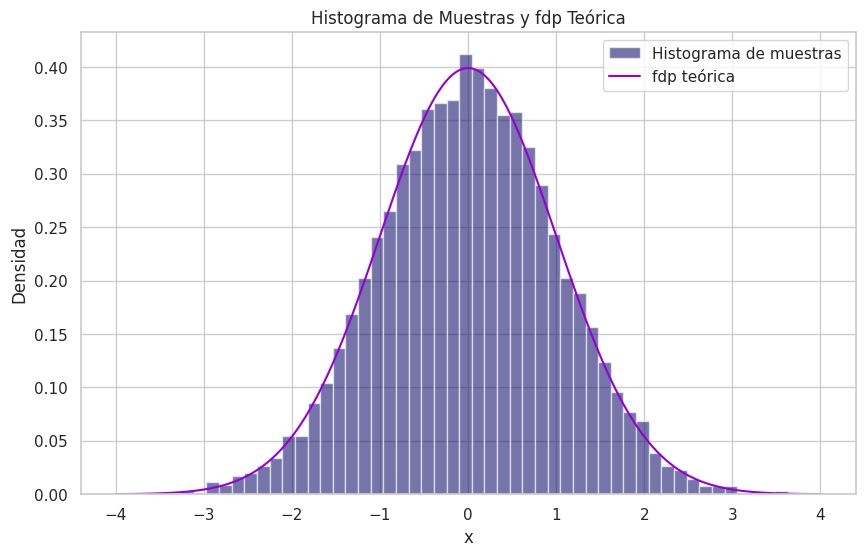

In [19]:
def propuesta_uniforme(a, b, size=1):
    return np.random.uniform(a, b, size)

# Parámetros de la distribución propuesta
a, b = -4, 4
M = 1 / (np.sqrt(2 * np.pi))

# Generar muestras
def aceptar_rechazar_normal(n):
    muestras = []
    while len(muestras) < n:
        x_propuesto = propuesta_uniforme(a, b)
        u = np.random.uniform(0, M)
        if u <= normal_fdp(x_propuesto):
            muestras.append(x_propuesto)
    return np.array(muestras)

# Número de muestras
num_samples = 10000
muestras = aceptar_rechazar_normal(num_samples)

# Graficar el histograma de las muestras
plt.figure(figsize=(10, 6))
plt.hist(muestras, bins=50, density=True, alpha=0.6, color='midnightblue', label='Histograma de muestras')

# Graficar la fdp teórica
plt.plot(x, y, label='fdp teórica', color='darkviolet')
plt.title('Histograma de Muestras y fdp Teórica')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

## NOTAS Y ACLARACIONES


1.  **Método de Aceptación y Rechazo:** Este método es útil para generar muestras aleatorias de una distribución complicada utilizando una distribución propuesta que es más fácil de muestrear.
2.   **Distribución Normal:** La distribución normal es una de las distribuciones más importantes en estadística y es simétrica alrededor de su media. En este ejemplo, hemos usado la distribución normal estándar.
3. **Implementación:** Hemos implementado la generación de muestras a partir de una distribución normal utilizando el método de aceptación y rechazo y graficado tanto la fdp, la FDA, como el histograma de las muestras generadas.
